In [1]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [89]:
n=10
x = np.linspace(0,10,n)
f = np.sin(.3*np.pi*x)*np.exp(x/10)
sigma = 0.1
np.random.seed(10)
noise = sigma*np.random.randn(n)
y = f+noise


Define 

$$\phi(x_1,x_2)=\alpha \exp\left(-\frac{\|x_1-x_2\|^2}{2\beta}\right).$$


Note that
$$y=\Phi u$$
has a unique solution.

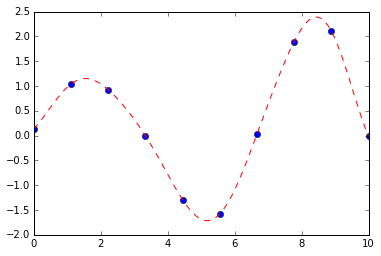

In [90]:
def phi(x1,x2,alpha = .2,beta = 1):
    x1 = np.array(x1)
    x2 = np.array(x2)
    diff = np.linalg.norm(x1-x2)
    return alpha*np.exp(-diff**2/(2*beta))
Phi = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        Phi[i,j] = phi(x[i],x[j])
u = np.linalg.solve(Phi,y)
def f_int(x_int, u, phi, x):
    n = x.shape[0]
    phi_x = np.zeros((n,1))
    for i in range(n):
        phi_x[i] = phi(x_int,x[i])
    return np.float(np.dot(np.transpose(phi_x),u))
        
    
n_int = 100
x_int = np.linspace(0,10,n_int)
y_int = np.zeros((n_int,1))
for i in range(n_int):
    y_int[i] = f_int(x_int[i],u,phi,x)
plt.plot(x,y,'o')
plt.plot(x_int,y_int,'--r')  